In [1]:
#importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
#reading the dataset using pandas function read_csv

data=pd.read_csv("news.csv")
data.head()


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
#drop the unnamed column

data.drop("Unnamed: 0",axis=1,inplace=True)


In [4]:
#display the first few rows of dataset

data.head()


,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
data.shape

(6335, 3)

In [6]:
data['label'].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [7]:
data.isnull().sum()   #no null values in the dataset

title    0
text     0
label    0
dtype: int64

In [8]:
data.duplicated()   #no duplicated values in the dataset

0       False
1       False
2       False
3       False
4       False
        ...  
6330    False
6331    False
6332    False
6333    False
6334    False
Length: 6335, dtype: bool

In [9]:
#Apply labelEncoder to label column

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [10]:
data.label=le.fit_transform(data.label)
data.head()   # 0-->FAKE , 1-->REAL


,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [11]:
#splitting the data into train and test data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.text,data.label,test_size=0.2,random_state=1)


In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(5068,)
(1267,)
(5068,)
(1267,)


#Naivve bayes algorithm

#CountVectorizer

In [13]:
#CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#creating an object for CountVectorizer
cvect=CountVectorizer()

In [14]:
# generate the word counts for the words in the documents
word_count_vect = cvect.fit(X_train)

#to get feature names
word_count_vect.get_feature_names()


['00',
 '000',
 '0000',
 '000000031',
 '00000031',
 '000035',
 '00006',
 '0001',
 '0001pt',
 '000billion',
 '000ft',
 '000km',
 '000x',
 '001',
 '0011',
 '003',
 '004',
 '005',
 '005s',
 '006',
 '006s',
 '007',
 '007s',
 '008s',
 '009',
 '00am',
 '00p',
 '00pm',
 '01',
 '010',
 '012',
 '013',
 '013c2812c9',
 '014',
 '015',
 '016',
 '018',
 '01am',
 '02',
 '020',
 '022',
 '023',
 '024',
 '025',
 '027',
 '02714',
 '028',
 '02870',
 '03',
 '030',
 '031',
 '0325',
 '033',
 '034',
 '035',
 '03747',
 '039',
 '04',
 '040',
 '0400',
 '042',
 '044',
 '047',
 '048',
 '049',
 '04pm',
 '05',
 '050',
 '052',
 '053',
 '056',
 '058',
 '06',
 '0600',
 '062',
 '063',
 '066',
 '068',
 '06pm',
 '07',
 '075',
 '0750',
 '079',
 '08',
 '080',
 '082',
 '084',
 '0843',
 '085',
 '0851',
 '0891',
 '09',
 '091',
 '093',
 '098263',
 '09am',
 '09pm',
 '0_65b67362bd',
 '0_kvyhphja',
 '0hour',
 '0hq3vb2giv',
 '0in',
 '0oeekvljlt',
 '0pt',
 '0womdwalmi',
 '10',
 '100',
 '1000',
 '10000s',
 '1000s',
 '1001',
 '100515p

In [15]:
doc_array=word_count_vect.transform(X_train)
doc_array

<5068x61502 sparse matrix of type '<class 'numpy.int64'>'
	with 1732321 stored elements in Compressed Sparse Row format>

In [16]:
#converting to an array
doc_array=word_count_vect.transform(X_train).toarray()
doc_array


array([[ 0, 13,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [17]:
#converting to a dataframe
feature_matrix=pd.DataFrame(doc_array,columns=word_count_vect.get_feature_names())
feature_matrix


,00,000,0000,000000031,00000031,000035,00006,0001,0001pt,000billion,...,תאמצנה,תוצאה,תחל,תיירות,תנותק,תעודת,תתרכז,القادمون,عربي,ยงade
0,0,13,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5063,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5064,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5066,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#applying fit_transform to the x_train

X_train_transformed=cvect.fit_transform(X_train)
X_train_transformed


<5068x61502 sparse matrix of type '<class 'numpy.int64'>'
	with 1732321 stored elements in Compressed Sparse Row format>

In [19]:
#applying transform method to x_test

X_test_transformed=cvect.transform(X_test)
X_test_transformed


<1267x61502 sparse matrix of type '<class 'numpy.int64'>'
	with 419437 stored elements in Compressed Sparse Row format>

In [20]:
cvect.vocabulary_


{'october': 38565,
 '31': 958,
 '2016': 671,
 'fort': 21842,
 'russ': 47312,
 'aleksandr': 3199,
 'khrolenko': 30528,
 'ia': 26845,
 'analytics': 3736,
 'translated': 55571,
 'by': 9031,
 'arnoldski': 4646,
 'hardly': 24908,
 'day': 14413,
 'goes': 23533,
 'without': 59980,
 'foreign': 21721,
 'media': 34553,
 'circulating': 10923,
 'the': 54430,
 'false': 20287,
 'accusations': 2272,
 'that': 54420,
 'leadership': 31716,
 'of': 38602,
 'syrian': 53479,
 'arab': 4425,
 'republic': 45847,
 'is': 28908,
 'guilty': 24322,
 'deaths': 14509,
 'hundreds': 26641,
 'thousands': 54688,
 'and': 3775,
 'even': 19445,
 'millions': 35281,
 'syrians': 53480,
 'authoritative': 5349,
 'international': 28484,
 'organizations': 39088,
 'are': 4517,
 'cited': 10961,
 'as': 4793,
 'sources': 51029,
 'dissemination': 16519,
 'such': 52730,
 'information': 27932,
 'in': 27424,
 'july': 29883,
 '2013': 668,
 'according': 2241,
 'to': 55046,
 'un': 56508,
 'secretary': 48597,
 'general': 22882,
 'ban': 5935,


In [21]:
#apply naivve bayes algorithm

from sklearn.naive_bayes import BernoulliNB

#creating an object
BernNB=BernoulliNB()


In [22]:
#applying algorithm to data

BernNB.fit(X_train_transformed,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

#Predicting on train data

In [23]:
#prediction on train data

y_train_pred=BernNB.predict(X_train_transformed)


In [24]:
#compare the actual values(y_train) with predicted values(y_train_pred1)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_train,y_train_pred)

array([[2324,  189],
       [ 595, 1960]], dtype=int64)

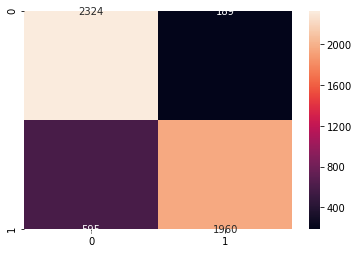

In [25]:
#visualizing confusion matrix
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt='3.0f')

In [26]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2513
           1       0.91      0.77      0.83      2555

    accuracy                           0.85      5068
   macro avg       0.85      0.85      0.84      5068
weighted avg       0.85      0.85      0.84      5068



#Predicting on test data

In [27]:
#prediction on test data
#syntax: objname.predict(Inputvallues)
y_test_pred=BernNB.predict(X_test_transformed)


In [28]:
#compare the actual values(y_test) with predicted values(y_test_pred1)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_test_pred)

array([[563,  88],
       [129, 487]], dtype=int64)

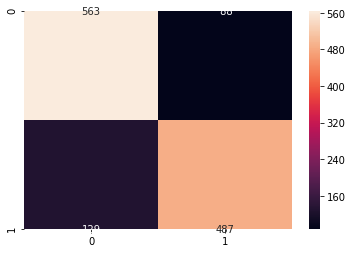

In [29]:
#visualizing confusion matrix
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,fmt='3.0f')


In [30]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       651
           1       0.85      0.79      0.82       616

    accuracy                           0.83      1267
   macro avg       0.83      0.83      0.83      1267
weighted avg       0.83      0.83      0.83      1267



#Tfidf Vectorizer

In [31]:
#TFIDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# initialize an object for tfidf vectorizer
tfidf=TfidfVectorizer()

In [32]:
# apply the fit_transform method on x_train ie. the input train data

X_train_tfidf=tfidf.fit_transform(X_train)
X_train_tfidf


<5068x61502 sparse matrix of type '<class 'numpy.float64'>'
	with 1732321 stored elements in Compressed Sparse Row format>

In [33]:
# apply the fit_transform method on x_test ie. the input test data

X_test_tfidf=tfidf.transform(X_test)
X_test_tfidf


<1267x61502 sparse matrix of type '<class 'numpy.float64'>'
	with 419437 stored elements in Compressed Sparse Row format>

In [34]:
#position of words in sparse matrix
tfidf.vocabulary_

{'october': 38565,
 '31': 958,
 '2016': 671,
 'fort': 21842,
 'russ': 47312,
 'aleksandr': 3199,
 'khrolenko': 30528,
 'ia': 26845,
 'analytics': 3736,
 'translated': 55571,
 'by': 9031,
 'arnoldski': 4646,
 'hardly': 24908,
 'day': 14413,
 'goes': 23533,
 'without': 59980,
 'foreign': 21721,
 'media': 34553,
 'circulating': 10923,
 'the': 54430,
 'false': 20287,
 'accusations': 2272,
 'that': 54420,
 'leadership': 31716,
 'of': 38602,
 'syrian': 53479,
 'arab': 4425,
 'republic': 45847,
 'is': 28908,
 'guilty': 24322,
 'deaths': 14509,
 'hundreds': 26641,
 'thousands': 54688,
 'and': 3775,
 'even': 19445,
 'millions': 35281,
 'syrians': 53480,
 'authoritative': 5349,
 'international': 28484,
 'organizations': 39088,
 'are': 4517,
 'cited': 10961,
 'as': 4793,
 'sources': 51029,
 'dissemination': 16519,
 'such': 52730,
 'information': 27932,
 'in': 27424,
 'july': 29883,
 '2013': 668,
 'according': 2241,
 'to': 55046,
 'un': 56508,
 'secretary': 48597,
 'general': 22882,
 'ban': 5935,


In [35]:
#IDF of the terms
tfidf.idf_


array([5.57965512, 2.63420451, 8.83775166, ..., 8.83775166, 8.43228655,
       8.83775166])

In [36]:
#apply naivve bayes algorithm

from sklearn.naive_bayes import BernoulliNB

#creating an obj for BernNB
tfidf_BernNB=BernoulliNB()


In [37]:
#applying algorithm to data

tfidf_BernNB.fit(X_train_tfidf,y_train)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

#Predicting on train data

In [38]:
#prediction on train data

y_train_pred1=tfidf_BernNB.predict(X_train_tfidf)


In [39]:
#compare the actual values(y_train) with predicted values(y_train_pred)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_train,y_train_pred1)


array([[2324,  189],
       [ 595, 1960]], dtype=int64)

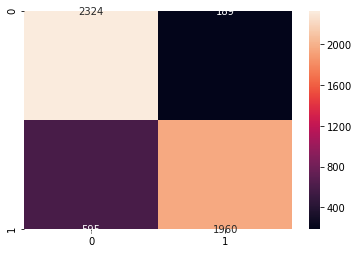

In [40]:
#visualizing confusion matrix
sns.heatmap(confusion_matrix(y_train,y_train_pred1),annot=True,fmt='3.0f')


In [41]:
print(classification_report(y_train,y_train_pred))


              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2513
           1       0.91      0.77      0.83      2555

    accuracy                           0.85      5068
   macro avg       0.85      0.85      0.84      5068
weighted avg       0.85      0.85      0.84      5068



#predicting on test data

In [42]:
#prediction on test data

y_test_pred1=tfidf_BernNB.predict(X_test_tfidf)


In [43]:
#compare the actual values(y_test) with predicted values(y_test_pred)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_test_pred1)


array([[563,  88],
       [129, 487]], dtype=int64)

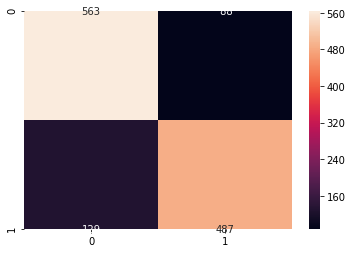

In [44]:
#visualizing confusion matrix
sns.heatmap(confusion_matrix(y_test,y_test_pred1),annot=True,fmt='3.0f')

In [45]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       651
           1       0.85      0.79      0.82       616

    accuracy                           0.83      1267
   macro avg       0.83      0.83      0.83      1267
weighted avg       0.83      0.83      0.83      1267

